In [81]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
x = torch.linspace(0, 799, 800)

In [3]:
y = torch.sin(x*2*3.1416/40)

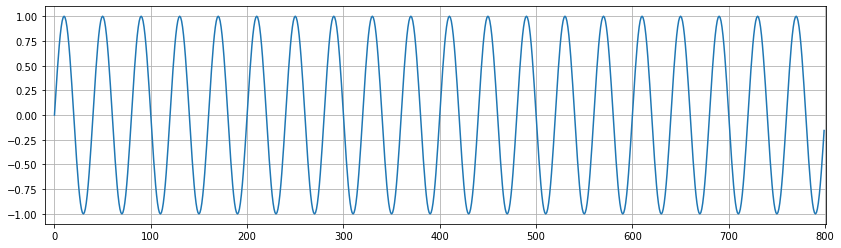

In [4]:
plt.figure(figsize =(14,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(y.numpy())

In [5]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

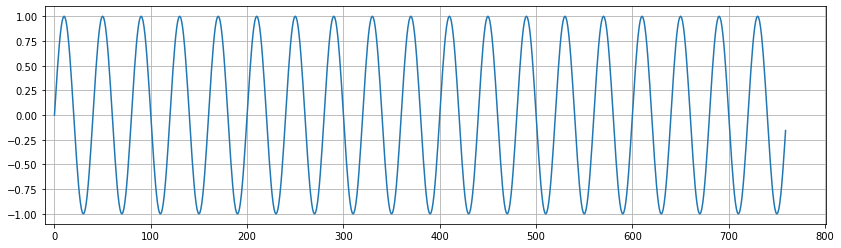

In [6]:
plt.figure(figsize =(14,4))
plt.xlim(-10, 801)
plt.grid(True)
plt.plot(train_set.numpy())

In [7]:
def input_data(seq, ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window, label))
        
    return out

In [8]:
window_size = 40

train_data = input_data(train_set, window_size)

In [9]:
len(train_data)

720

In [10]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [11]:
class LSTM(nn.Module):
    def __init__(self, input_size = 1, hidden_size = 50, out_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, out_size)
        
        self.hidden = (torch.zeros(1,1, hidden_size), torch.zeros(1,1, hidden_size))
        
    def forward(self, seq):
        
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq), -1))
        
        return pred[-1]
        

In [12]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

Epoch 0 Loss: 0.037489693611860275
Performance on test range: 0.5085774064064026


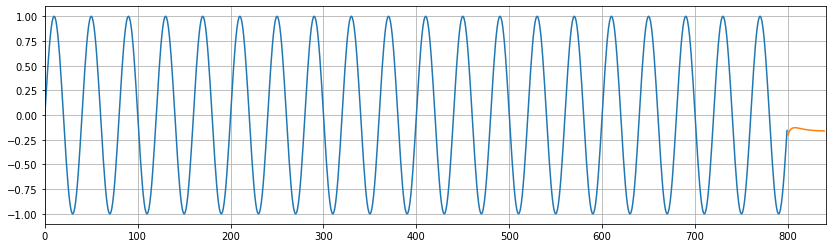

Epoch 1 Loss: 0.01385416928678751
Performance on test range: 0.3881300091743469


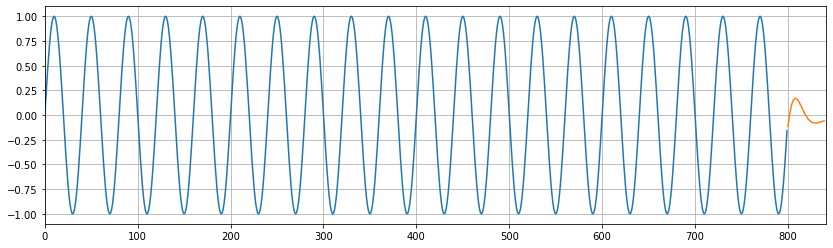

Epoch 2 Loss: 0.001851152046583593
Performance on test range: 0.12237145751714706


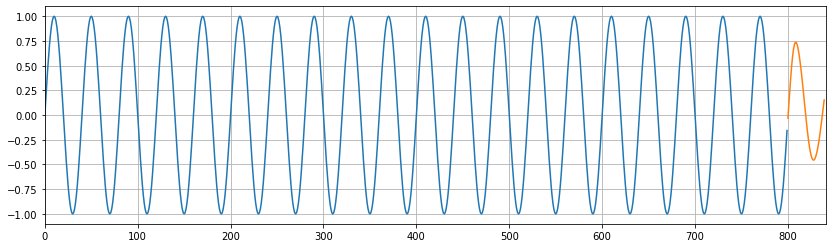

Epoch 3 Loss: 0.00023536635853815824
Performance on test range: 0.025023167952895164


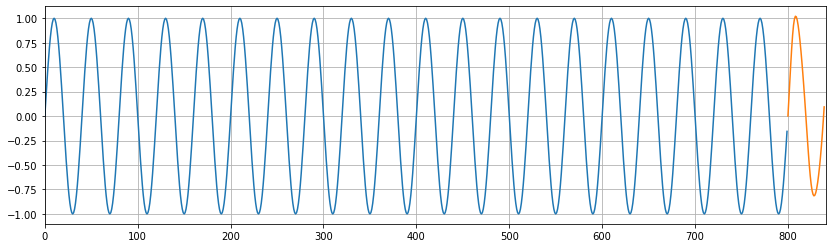

Epoch 4 Loss: 0.0001203153224196285
Performance on test range: 0.014320427551865578


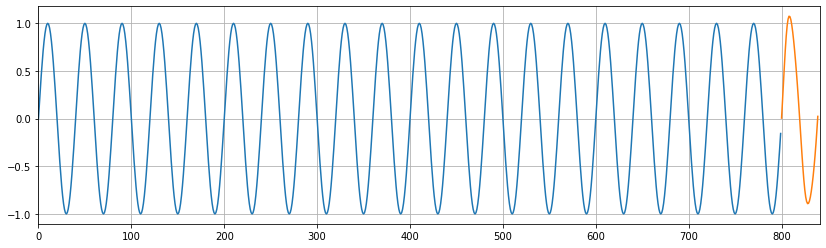

Epoch 5 Loss: 0.00011801105574704707
Performance on test range: 0.011622024700045586


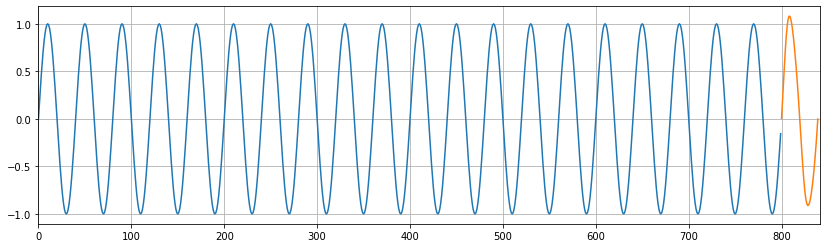

Epoch 6 Loss: 0.00012529475498013198
Performance on test range: 0.010010476224124432


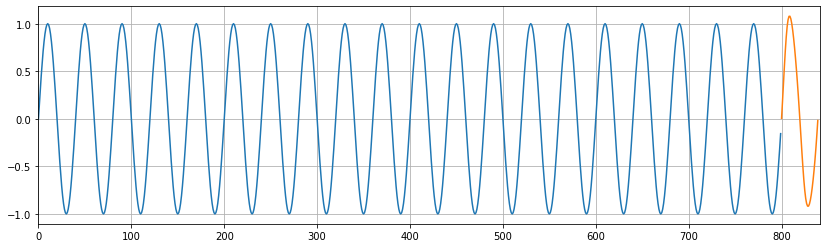

Epoch 7 Loss: 0.00013066011888440698
Performance on test range: 0.008778957650065422


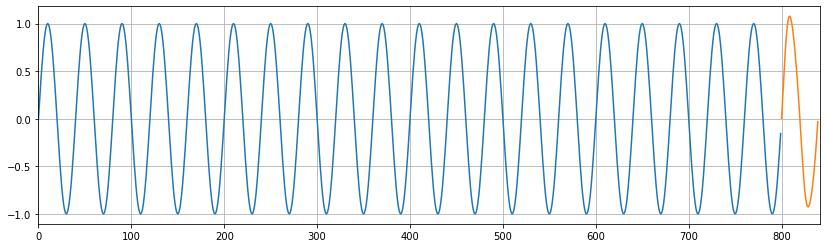

Epoch 8 Loss: 0.000133118883240968
Performance on test range: 0.007787120994180441


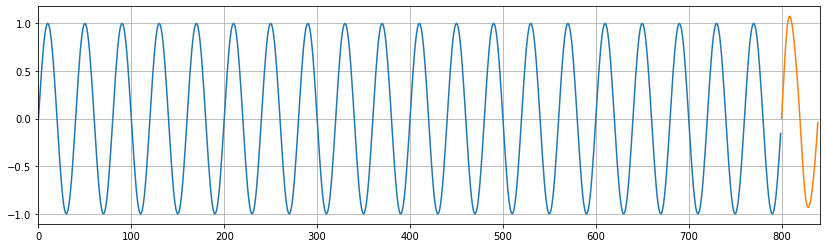

Epoch 9 Loss: 0.0001331536186626181
Performance on test range: 0.006974929478019476


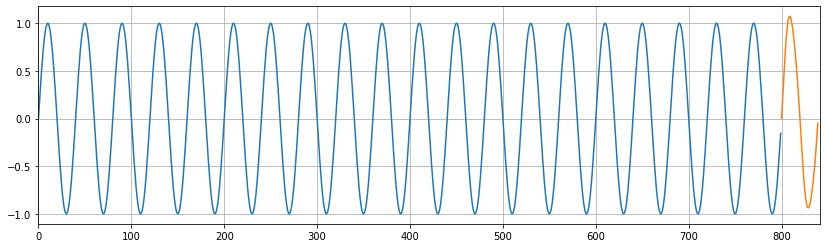

Epoch 10 Loss: 0.00013136146299075335
Performance on test range: 0.006303074769675732


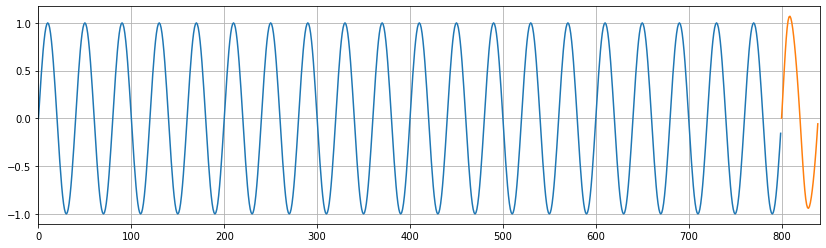

Epoch 11 Loss: 0.00012825836893171072
Performance on test range: 0.005742593668401241


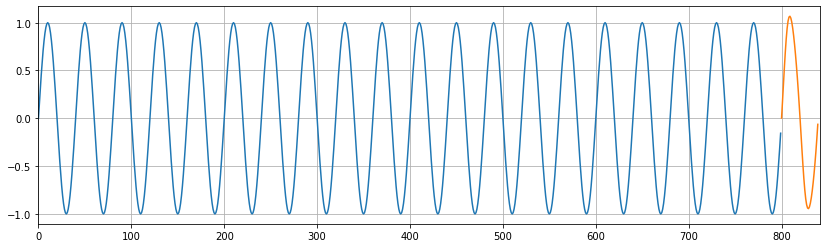

Epoch 12 Loss: 0.00012426075409166515
Performance on test range: 0.005271200556308031


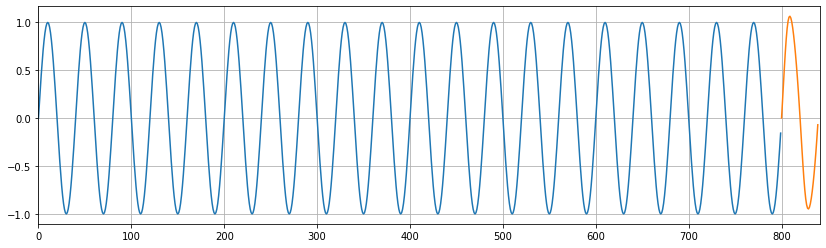

Epoch 13 Loss: 0.00011968589387834072
Performance on test range: 0.004871751647442579


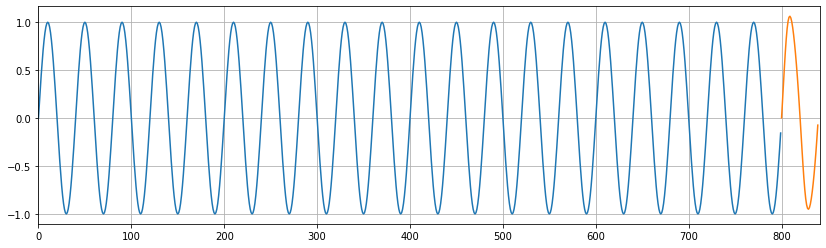

Epoch 14 Loss: 0.00011477946100058034
Performance on test range: 0.004530857317149639


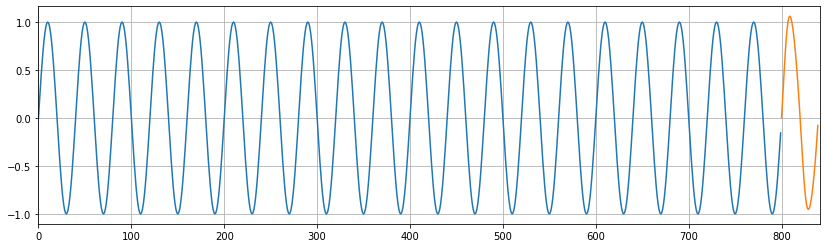

Epoch 15 Loss: 0.00010971958545269445
Performance on test range: 0.004237878601998091


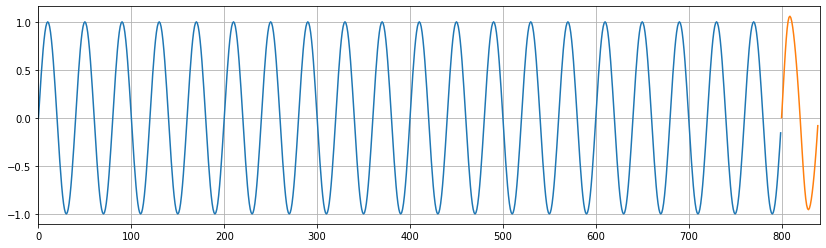

Epoch 16 Loss: 0.00010464141087140888
Performance on test range: 0.003984394948929548


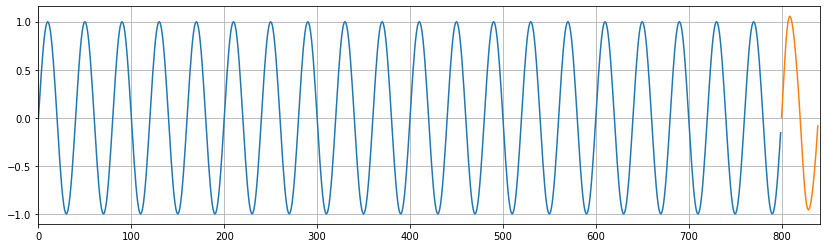

Epoch 17 Loss: 9.963654883904383e-05
Performance on test range: 0.0037638817448168993


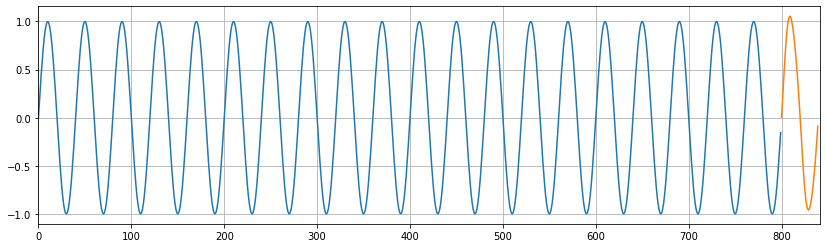

Epoch 18 Loss: 9.477231651544571e-05
Performance on test range: 0.0035707447677850723


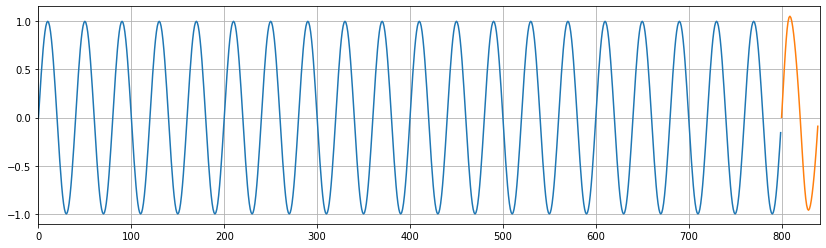

Epoch 19 Loss: 9.009089990286157e-05
Performance on test range: 0.0034007844515144825


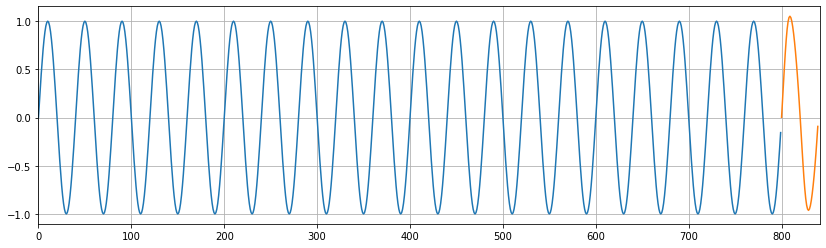

Epoch 20 Loss: 8.562040602555498e-05
Performance on test range: 0.00325043429620564


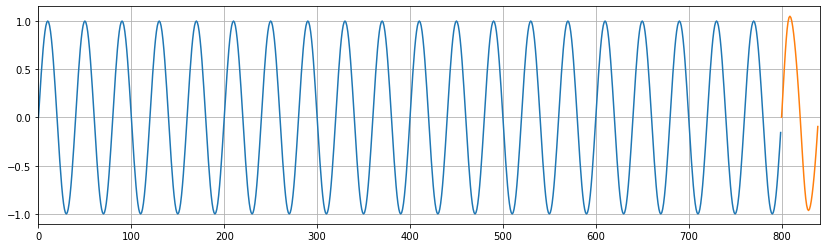

Epoch 21 Loss: 8.137304394040257e-05
Performance on test range: 0.0031165434047579765


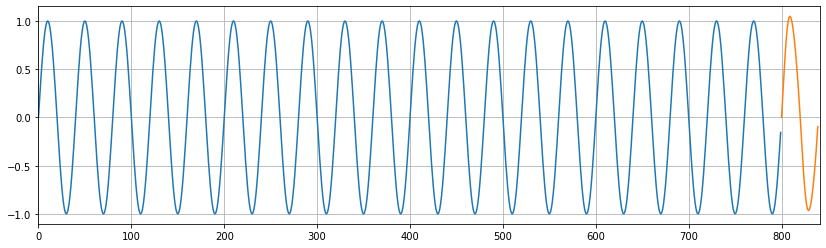

Epoch 22 Loss: 7.735714461887255e-05
Performance on test range: 0.002996796276420355


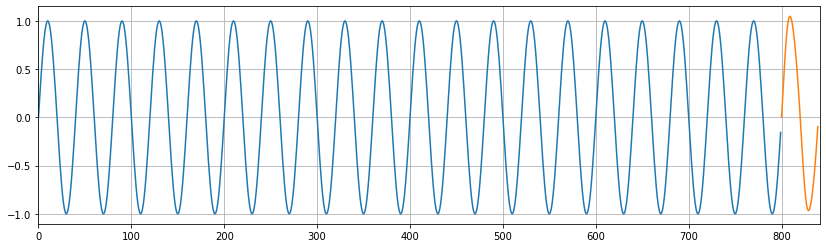

Epoch 23 Loss: 7.357087451964617e-05
Performance on test range: 0.0028892983682453632


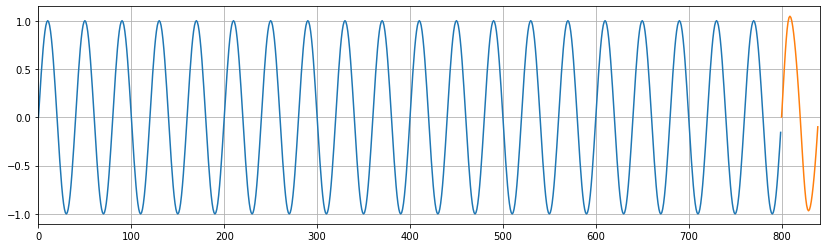

Epoch 24 Loss: 7.0009715273045e-05
Performance on test range: 0.0027922983281314373


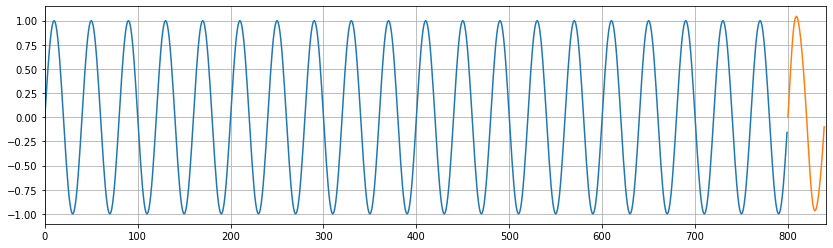

Epoch 25 Loss: 6.66640917188488e-05
Performance on test range: 0.0027042601723223925


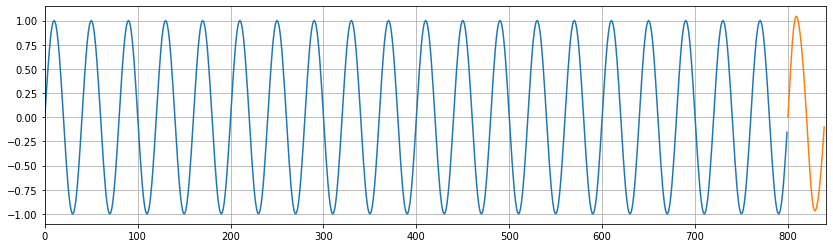

Epoch 26 Loss: 6.352787022478878e-05
Performance on test range: 0.0026242434978485107


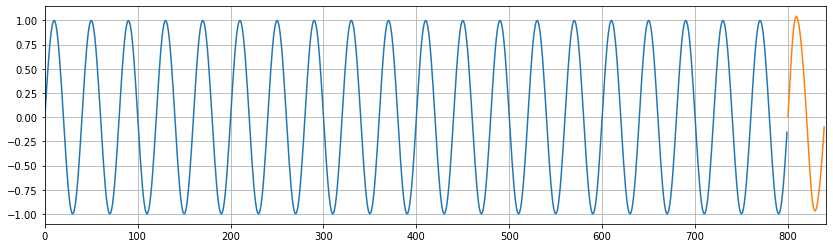

Epoch 27 Loss: 6.058754661353305e-05
Performance on test range: 0.0025510243140161037


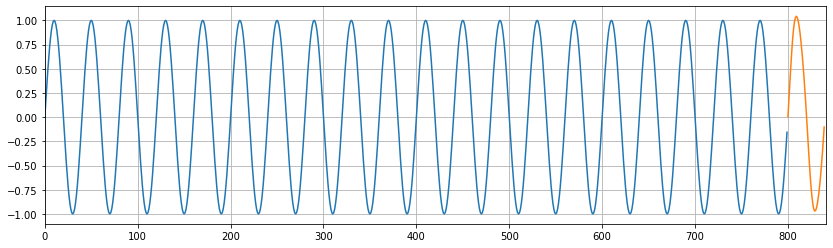

Epoch 28 Loss: 5.783128654002212e-05
Performance on test range: 0.0024838310200721025


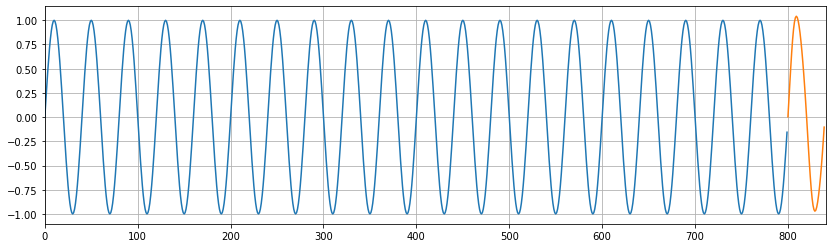

Epoch 29 Loss: 5.5248117860173807e-05
Performance on test range: 0.0024218433536589146


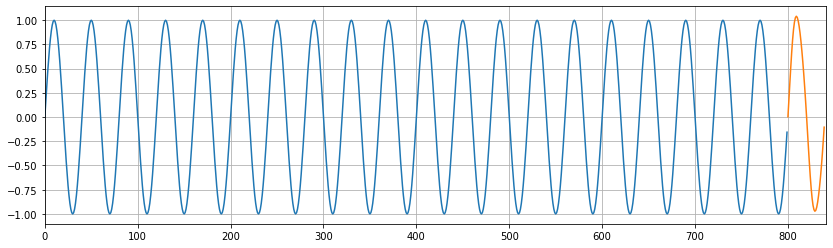

Epoch 30 Loss: 5.283222344587557e-05
Performance on test range: 0.0023647071793675423


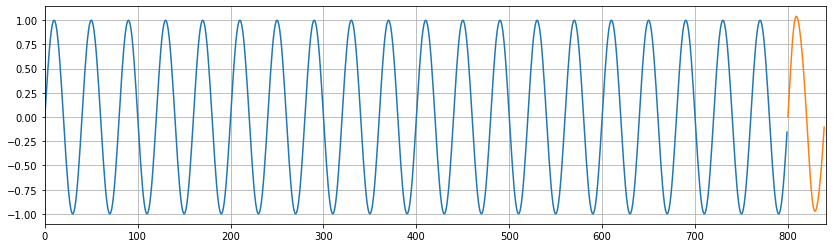

Epoch 31 Loss: 5.05603602505289e-05
Performance on test range: 0.002311508636921644


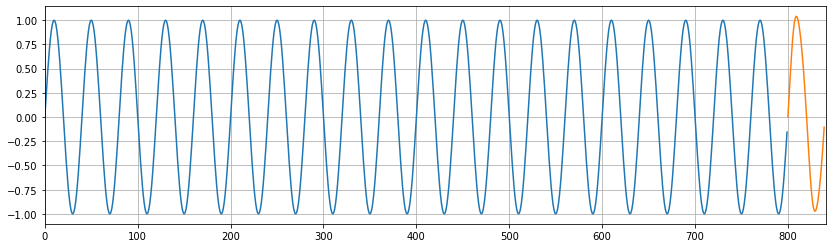

Epoch 32 Loss: 4.843295391765423e-05
Performance on test range: 0.002262077759951353


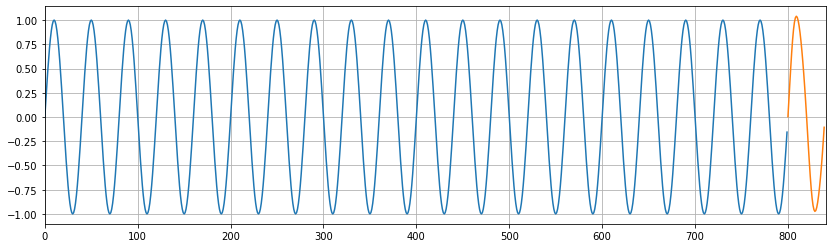

Epoch 33 Loss: 4.6434699470410123e-05
Performance on test range: 0.002215840620920062


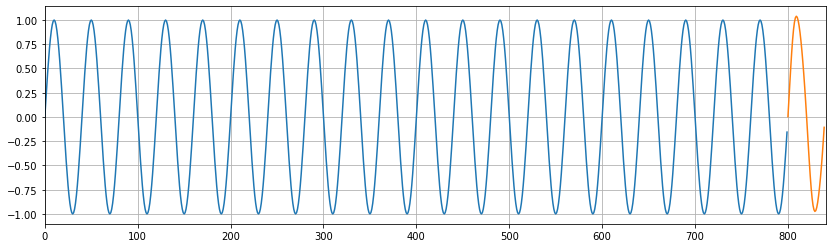

Epoch 34 Loss: 4.455668749869801e-05
Performance on test range: 0.002172615146264434


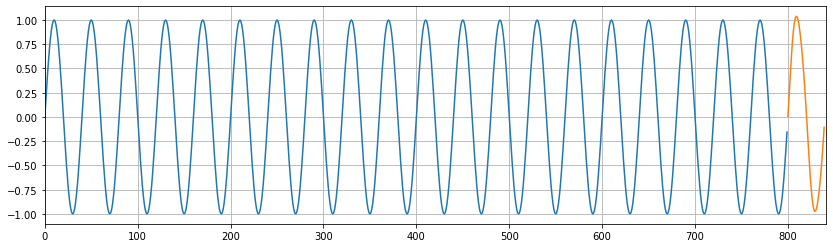

Epoch 35 Loss: 4.279168206267059e-05
Performance on test range: 0.002131957095116377


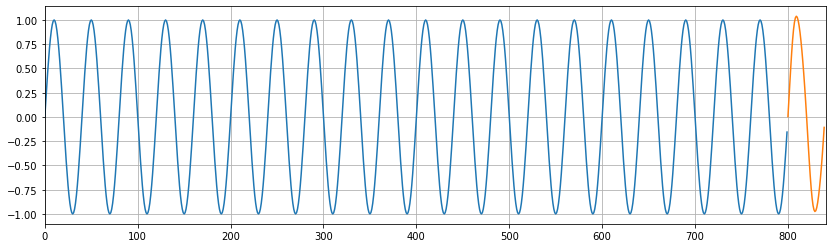

KeyboardInterrupt: 

In [14]:
epochs = 50
future = 40

for i in range(epochs):
    
    for seq, y_train in train_data:
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), 
                       torch.zeros(1,1,model.hidden_size))
        
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {i} Loss: {loss.item()}")
    
    preds = train_set[-window_size:].tolist()
    
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        
        with torch.no_grad():
            
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                           torch.zeros(1,1,model.hidden_size))
            
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f"Performance on test range: {loss}")

    plt.figure(figsize = (14,4))
    plt.xlim(0, 841)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(800, 840), preds[window_size:])
    plt.show()
        
        

In [ ]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
epochs = 50
future = 40

for i in range(epochs):
    
    for seq, y_train in train_data:
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), 
                       torch.zeros(1,1,model.hidden_size))
        
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {i} Loss: {loss.item()}")
    
    preds = train_set[-window_size:].tolist()
    
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        
        with torch.no_grad():
            
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                           torch.zeros(1,1,model.hidden_size))
            
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f"Performance on test range: {loss}")

    plt.figure(figsize = (14,4))
    plt.xlim(0, 841)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(800, 840), preds[window_size:])
    plt.show()
        
        

# Own Train set

In [151]:
def LoadDataframe():
    df = pd.read_csv('sentiment/reducedLstmData.csv', delimiter = ';', index_col = None)
    #df['target'] = df.price_close.diff()
    df['target'] = df.price_close.shift(-1)
    df = df.head(df.shape[0]-1)
    return df

In [152]:
def TrainTestSplit(df, ratio):
    train_size = int(len(df)*ratio)
    test_size = len(df)-train_size
    train_set = df.iloc[: train_size]
    test_set = df.iloc[-test_size:]

    return train_set, test_set

def input_data(seq, ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq.iloc[i:i+window_size]
        window_values = torch.from_numpy(window.values)
        label = seq.target.iloc[i+ws:i+ws+1]
        label_value = torch.from_numpy(label.values)
        out.append((window_values, label_value))
        
    return out

In [153]:
df = LoadDataframe()

In [154]:
window_size = 10
train_df, test_df = TrainTestSplit(df, 0.9)
train_data = input_data(df, window_size)

In [156]:
train_df.head(3)

,noTweets,sum_compound,avg_sum_compound,price_open,price_close,volume_traded,trades_count,target
0,2652,521.1693,0.196456,3992.70,3935.76,4.842621e+07,21271.0,3968.000000
1,2674,482.5923,0.180254,3999.00,3968.00,2.327041e+08,64705.0,3974.500000
2,2407,530.6851,0.220191,3966.89,3974.50,6.001377e+07,20275.0,3976.566307


In [137]:
test_df.head(1)

,noTweets,sum_compound,avg_sum_compound,price_open,price_close,volume_traded,trades_count,target
6435,2735,797.2441,0.291408,7162.595482,7126.5,2.583845e+07,27195.0,-5.71


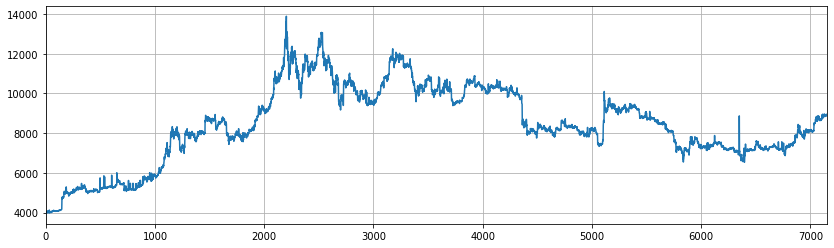

In [160]:
plt.figure(figsize =(14,4))
plt.xlim(0, train_df.shape[0]+test_df.shape[0])
plt.grid(True)
plt.plot(df.price_close)


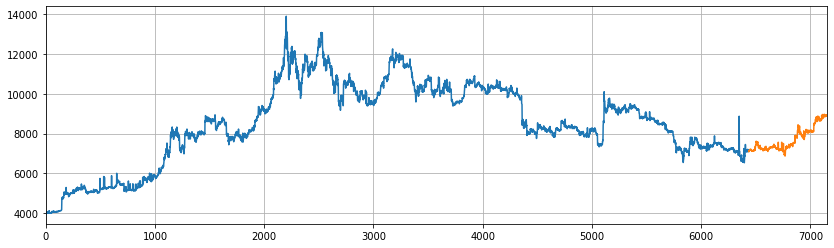

In [159]:
plt.figure(figsize =(14,4))
plt.xlim(0, train_df.shape[0]+test_df.shape[0])
plt.grid(True)
plt.plot(train_df.target)
plt.plot(test_df.target)

In [163]:
class MLSTM(nn.Module):
    def __init__(self, input_size = 8, hidden_size = 50, out_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, out_size)
        
        self.hidden = (torch.zeros(1,1, hidden_size), torch.zeros(1,1, hidden_size))
        
    def forward(self, seq):
        
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq), -1))
        
        return pred[-1]
        

In [164]:
torch.manual_seed(42)
model = MLSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [162]:
epochs = 50
future = 40

for i in range(epochs):
    
    for seq, y_train in train_data:
        print(seq)
        print(y_train)
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), 
                       torch.zeros(1,1,model.hidden_size))
        
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {i} Loss: {loss.item()}")
    
    preds = train_set[-window_size:].tolist()
    
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        
        with torch.no_grad():
            
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                           torch.zeros(1,1,model.hidden_size))
            
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f"Performance on test range: {loss}")

    plt.figure(figsize = (14,4))
    plt.xlim(0, 841)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(800, 840), preds[window_size:])
    plt.show()
        
        

tensor([[2.6520e+03, 5.2117e+02, 1.9646e-01, 3.9927e+03, 3.9358e+03, 4.8426e+07,
         2.1271e+04, 3.9680e+03],
        [2.6740e+03, 4.8259e+02, 1.8025e-01, 3.9990e+03, 3.9680e+03, 2.3270e+08,
         6.4705e+04, 3.9745e+03],
        [2.4070e+03, 5.3069e+02, 2.2019e-01, 3.9669e+03, 3.9745e+03, 6.0014e+07,
         2.0275e+04, 3.9766e+03],
        [2.3220e+03, 5.4690e+02, 2.3514e-01, 3.9684e+03, 3.9766e+03, 3.0470e+07,
         1.4230e+04, 3.9755e+03],
        [2.2070e+03, 5.2112e+02, 2.3607e-01, 4.0450e+03, 3.9755e+03, 4.8453e+07,
         1.6737e+04, 3.9901e+03],
        [2.3300e+03, 5.3307e+02, 2.2876e-01, 3.9750e+03, 3.9901e+03, 4.8957e+07,
         1.8355e+04, 4.0444e+03],
        [2.6300e+03, 6.4643e+02, 2.4563e-01, 3.9880e+03, 4.0444e+03, 3.8712e+07,
         1.3367e+04, 3.9810e+03],
        [3.0030e+03, 7.1011e+02, 2.3643e-01, 4.0516e+03, 3.9810e+03, 1.6022e+07,
         9.0320e+03, 3.9820e+03],
        [3.1260e+03, 7.8095e+02, 2.4952e-01, 4.0502e+03, 3.9820e+03, 2.9340e+07,

RuntimeError: input.size(-1) must be equal to input_size. Expected 1, got 8

In [165]:
torch.zeros(1,1,50)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0.]]])